# What is Binning:

*  Binning, also known as bucketing, is a data preprocessing technique in machine learning used to group continuous numerical variables into discrete intervals or "bins".
* Each data point is then assigned a label (or) value corresponding to the bin into which it falls.

 # Why do we use Binning:

- Reduce noise in data

- Handle outliers

- Simplify complex data

- Improve model interpretability

- Convert continuous --> categorial

# Used in:
- ⁠Decision Trees

- ⁠Rule-based models

- Business analytics

- Credit scoring, grading systems

# Types of Binning

- 1.⁠ ⁠Equal-Width Binning (Distance Binning)
- 2. Equal-Frequency Binning (Quantile Binning)
- 3.⁠ ⁠Custom / Domain-Based Binning


 # 1.⁠ ⁠Equal-Width Binning (Distance Binning):

•⁠  ⁠Equal-Width Binning divides the entire range of a continuous variable into a fixed number of bins, where each bin has the same width (distance).

•⁠  ⁠This method does not consider how data is

distributed inside the range. It only focuses on the minimum and maximum values.

# Formula:
- Bin width = (max - min) /k

## Example:
[18,22,25,30,35,40,45,50]

- min=18
- max=50
- k=4
- Bin_width = (50-18)/4 = 32/4 = 8

Bins:

- 18-26

- 26-34

- 34-42

- 42-50

### Keypoint:
- count different
- Range same

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.DataFrame({
    "age": [18, 22, 25, 30, 35, 40, 45, 50]
                    })

print(data)

   age
0   18
1   22
2   25
3   30
4   35
5   40
6   45
7   50


# Equal-Width

In [8]:
data["age_bin"] = pd.cut(data["age"],bins=4)

In [6]:
data

,age,age_bin
0,18,"(17.968, 26.0]"
1,22,"(17.968, 26.0]"
2,25,"(17.968, 26.0]"
3,30,"(26.0, 34.0]"
4,35,"(34.0, 42.0]"
5,40,"(34.0, 42.0]"
6,45,"(42.0, 50.0]"
7,50,"(42.0, 50.0]"


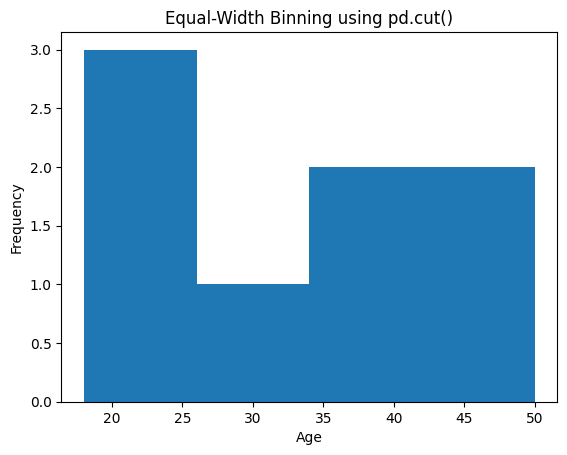

In [14]:
plt.hist(data["age"], bins=4)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal-Width Binning using pd.cut()")
plt.show()

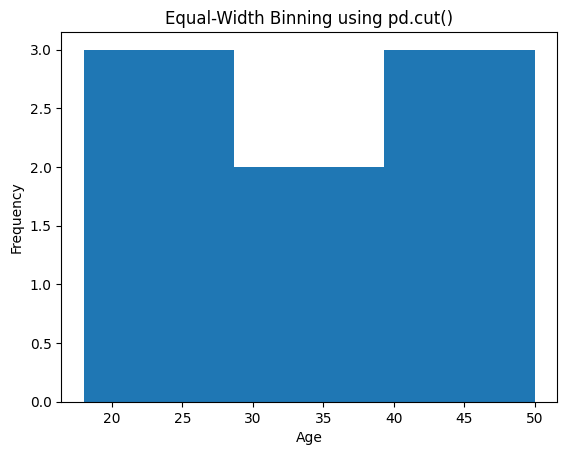

In [13]:
plt.hist(data["age"], bins=3)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal-Width Binning using pd.cut()")
plt.show()

# Equal-Frequency Binning (Quantile Binning):

•⁠  ⁠Equal-Frequency Binning divides the data into bins such that each bin contains approximately the same number of observations.

- This method uses the data distribution and is based on quantiles (percentiles).
## Formula:
- Total observations = n
- Number of bins = k
### Observations per bin:
- n/k
- Example:
- [18,22,25,30,35,40,45,50]
- observations per bin: 8/4=2
#### Bins:
- First 2 values ->Bin 1
- Next 2 values -> Bin 2
- Next 2 values -> Bin 3
- Last 2 Vlues -> Bin 4
#### Keypoints:
- count same
- Rnage different 

In [15]:
data["age_frequency_bin"] = pd.qcut(data["age"], q=4)
data

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,age,age_bin,age_frequency_bin
0,18,"(17.968, 26.0]","(17.999, 24.25]"
1,22,"(17.968, 26.0]","(17.999, 24.25]"
2,25,"(17.968, 26.0]","(24.25, 32.5]"
3,30,"(26.0, 34.0]","(24.25, 32.5]"
4,35,"(34.0, 42.0]","(32.5, 41.25]"
5,40,"(34.0, 42.0]","(32.5, 41.25]"
6,45,"(42.0, 50.0]","(41.25, 50.0]"
7,50,"(42.0, 50.0]","(41.25, 50.0]"


In [13]:
bin_min = data["age"].groupby(data["age_bin"]).median()
bin_min

/var/folders/f6/sxmbz1393v1f8m09fy763k9m0000gn/T/ipykernel_852/1827576727.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_min = data["age"].groupby(data["age_bin"]).median()


age_bin
(17.968, 26.0]    22.0
(26.0, 34.0]      30.0
(34.0, 42.0]      37.5
(42.0, 50.0]      47.5
Name: age, dtype: float64

# Custom / Domain-Based Binning:
Custom Binning uses predefined bin boundaries based on domain
knowledge, business rules, or external standards.
This method is not data-driven, but context-driven.
- Example (Age Groups)
Bins:
13-25 → Young
25-35 → Adult
35-50 → Senior

In [18]:
custom_bins = [17, 25, 35, 50]
labels = ["Young","Adults","Senior"]

bins = pd.cut(data["age"], bins=custom_bins, labels=labels)
bins

0     Young
1     Young
2     Young
3    Adults
4    Adults
5    Senior
6    Senior
7    Senior
Name: age, dtype: category
Categories (3, object): ['Young' < 'Adults' < 'Senior']

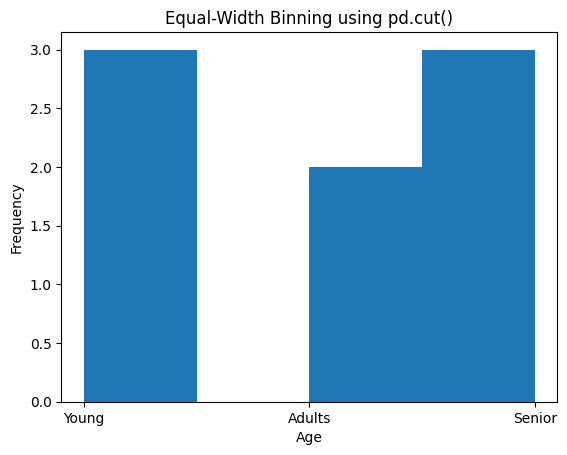

In [20]:
plt.hist(bins,bins=4)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal-Width Binning using pd.cut()")
plt.show()